# Boundary Layer Final Project

The goal of this project is to determine flow characteristics for turbulent flow from PIV data.

### Project Requirements
* Reproduce the turbulent parts of figure 1.a and 1.b from Adrian. Make the plots for 1.b for y+ = 5, 10, 100, 500
* Find the wall shear stress value by curve fitting a Spaulding profile
* Plot the mean streamwise velocity in wall coordinates
* Find the mixing length as a function of position the boundary layer

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read the Data
x = []
y = []
v = []
u = []
for i in range(1, 1000+1):
    if i < 10:
        filename = f'piv-data/B0000{i}.dat'
    elif i < 100:
        filename = f'piv-data/B000{i}.dat'
    elif i < 1000:
        filename = f'piv-data/B00{i}.dat'
    else:
        filename = f'piv-data/B0{i}.dat'
    data = pd.read_csv(filename, header=None, delimiter=" ", skiprows=3)
    if len(x) == 0:
        x_raw = data.iloc[:, 0]
        for x_val in x_raw:
            x_adjusted = -1 * x_val
            if x_adjusted not in x:
                x.append(x_adjusted)
    if len(y) == 0:
        y_raw = data.iloc[:, 1].values
        for y_val in y_raw:
            if y_val not in y:
                y.append(y_val)
    vx = data.iloc[:, 2].values
    vy = data.iloc[:, 3].values
    v_row = []
    u_row = []
    v_grid = []
    u_grid = []
    for j in range(len(vx)):
        x_index = len(u_row)
        if x_index % len(x) == 0 and x_index != 0:
            v_grid.append(v_row)
            u_grid.append(u_row)
            v_row = []
            u_row = []
        v_row.append(vx[i])
        u_row.append(vy[i])
    v.append(v_grid)
    u.append(u_grid)
print(f"x: {len(x)}")
print(f"y: {len(y)}")

x: 324
y: 131


In [12]:
print(len(u))

1000


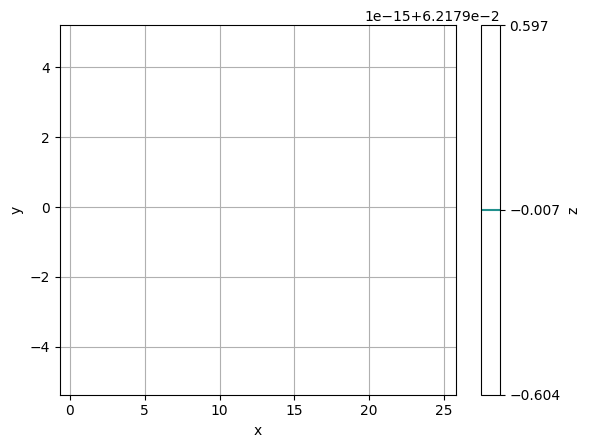

In [17]:
# Wall Coordinate Transformations
plt.figure()
plt.contour(x, y[0:-1], v[999], levels=20)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="z")
plt.grid(True)
plt.show()